In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
features_list = pd.read_excel('feature.xlsx',index_col=False)
features_list

,features,label,Descriptionl,Description
0,v012,0,Current age of respondent,Current age of respondent
1,v136,0,Total number of household members + visitors w...,Total number of household members is the numbe...
2,v137,0,Number of children resident in the household a...,Number of children resident in the household a...
3,v138,0,total women. Eligible women defined as aged 1...,Number of eligible women in the household. Eli...
4,v015,0,Result of individual interview,Result of individual interview
5,v024,0,Region of residence,Region of residence
6,v025,0,Type of place of residence,Type of place of residence
7,v104,0,Time lived in current place of residence,Time lived in current place of residence
8,v106,0,Ever attended school,Ever attended school
9,v107,0,Highest grade at that level,Highest grade at that level


In [3]:
df = pd.read_csv('FinalData_I.csv',index_col=False)
df

,Unnamed: 0,v012,v136,v137,v138,v015,v024,v025,v104,v106,...,v155,v157,v158,v159,v160,v161,m17,m17a,b4,b5
0,0,18,6,1,1,completed,barisal,rural,1,higher,...,able to read whole sentence,not at all,not at all,not at all,no,wood,yes,before labor started,male,yes
1,1,35,6,1,1,completed,barisal,rural,19,primary,...,able to read whole sentence,not at all,not at all,not at all,yes,wood,no,no decision taken,male,yes
2,2,21,6,0,3,completed,barisal,rural,visitor,secondary,...,able to read whole sentence,not at all,not at all,not at all,not a dejure resident,not a dejure resident,yes,after labor started,male,yes
3,3,21,6,0,3,completed,barisal,rural,visitor,secondary,...,able to read whole sentence,not at all,not at all,not at all,not a dejure resident,not a dejure resident,no,no decision taken,female,no
4,4,31,8,2,1,completed,barisal,rural,18,primary,...,cannot read at all,not at all,not at all,not at all,yes,wood,no,no decision taken,male,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,4911,34,5,2,1,completed,sylhet,urban,4,higher,...,able to read whole sentence,less than once a week,not at all,less than once a week,no,natural gas,yes,before labor started,female,yes
4912,4912,23,7,0,2,completed,sylhet,urban,visitor,higher,...,able to read whole sentence,less than once a week,less than once a week,at least once a week,not a dejure resident,not a dejure resident,yes,before labor started,male,yes
4913,4913,23,7,0,2,completed,sylhet,urban,visitor,higher,...,able to read whole sentence,less than once a week,less than once a week,at least once a week,not a dejure resident,not a dejure resident,yes,before labor started,male,yes
4914,4914,30,4,2,1,completed,sylhet,urban,2,higher,...,able to read whole sentence,at least once a week,not at all,at least once a week,no,natural gas,yes,before labor started,male,yes


In [4]:
df = df.drop(['Unnamed: 0'],axis='columns')
df

,v012,v136,v137,v138,v015,v024,v025,v104,v106,v107,...,v155,v157,v158,v159,v160,v161,m17,m17a,b4,b5
0,18,6,1,1,completed,barisal,rural,1,higher,2.0,...,able to read whole sentence,not at all,not at all,not at all,no,wood,yes,before labor started,male,yes
1,35,6,1,1,completed,barisal,rural,19,primary,5.0,...,able to read whole sentence,not at all,not at all,not at all,yes,wood,no,no decision taken,male,yes
2,21,6,0,3,completed,barisal,rural,visitor,secondary,5.0,...,able to read whole sentence,not at all,not at all,not at all,not a dejure resident,not a dejure resident,yes,after labor started,male,yes
3,21,6,0,3,completed,barisal,rural,visitor,secondary,5.0,...,able to read whole sentence,not at all,not at all,not at all,not a dejure resident,not a dejure resident,no,no decision taken,female,no
4,31,8,2,1,completed,barisal,rural,18,primary,1.0,...,cannot read at all,not at all,not at all,not at all,yes,wood,no,no decision taken,male,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,34,5,2,1,completed,sylhet,urban,4,higher,2.0,...,able to read whole sentence,less than once a week,not at all,less than once a week,no,natural gas,yes,before labor started,female,yes
4912,23,7,0,2,completed,sylhet,urban,visitor,higher,2.0,...,able to read whole sentence,less than once a week,less than once a week,at least once a week,not a dejure resident,not a dejure resident,yes,before labor started,male,yes
4913,23,7,0,2,completed,sylhet,urban,visitor,higher,2.0,...,able to read whole sentence,less than once a week,less than once a week,at least once a week,not a dejure resident,not a dejure resident,yes,before labor started,male,yes
4914,30,4,2,1,completed,sylhet,urban,2,higher,6.0,...,able to read whole sentence,at least once a week,not at all,at least once a week,no,natural gas,yes,before labor started,male,yes


In [8]:
for i in range(len(df.columns)):
    x = df.iloc[:,i].value_counts()
    print(features_list.iloc[i,-1])
    print(x)
    print("******************************")
    print("                              ")
    print("                              ")

Current age of respondent
21    387
22    379
20    371
19    358
23    328
24    327
25    316
18    307
26    281
27    253
28    233
30    213
29    206
31    167
32    136
17    116
33    114
35     81
34     76
16     72
36     52
37     37
15     26
38     25
39     17
40     12
41     11
43      5
42      4
44      3
48      1
45      1
46      1
Name: v012, dtype: int64
******************************
                              
                              
Total number of household members is the number of usual residents plus the number of visitors who slept in the house the previous night that were listed in the household schedule
5     974
4     897
6     795
7     522
3     508
8     367
9     250
10    164
11    148
12     78
13     65
2      53
14     32
15     23
19      8
16      7
17      7
20      6
23      4
18      3
30      3
22      1
1       1
Name: v136, dtype: int64
******************************
                              
                             

at least once a week     2671
not at all               1810
less than once a week     435
Name: v159, dtype: int64
******************************
                              
                              
Toilet facilities shared with other households
no                       2765
yes                      1460
not a dejure resident     691
Name: v160, dtype: int64
******************************
                              
                              
Type of cooking fuel
wood                       2066
agricultural crop          1002
not a dejure resident       691
natural gas                 547
lpg                         300
animal dung                 250
electricity                  24
straw/shrubs/grass           20
biogas                        6
charcoal                      5
other                         3
no food cooked in house       1
kerosene                      1
Name: v161, dtype: int64
******************************
                              
             

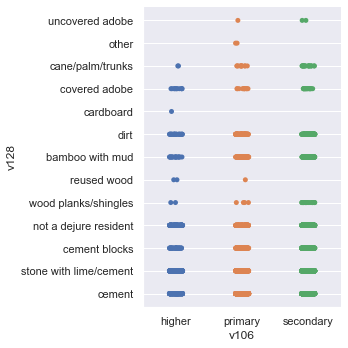

In [41]:
sns.catplot(data=df, y="v128", x="v106")

In [134]:
def enc(x):
    encoder = LabelEncoder()
    
    if x.dtypes != 'int8':
        encd = encoder.fit_transform(x)
    
    else:
        encd = x
   
    #encd = encoder.fit_transform(x)
    return encd

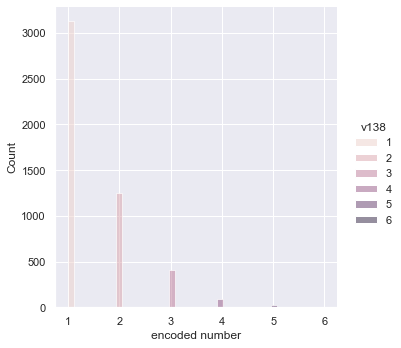

1    3131
2    1255
3     413
4      89
5      21
6       7
Name: v138, dtype: int64


In [138]:
for k in range(1):
    i=3
    variable = df.iloc[:,i]
    variable_name = str(df.columns[i])
    
    data = pd.DataFrame(
        {
            variable_name   : variable,
            "encoded number": variable#enc(variable)
        })
    
    sns.set_palette(sns.color_palette("tab10"))
    g = sns.displot(data, x = "encoded number",hue=variable_name)
    
    
    name_of_image = variable_name + ".png"
    plt.savefig(name_of_image)
    
                    
    plt.show()  
    print(variable.value_counts())

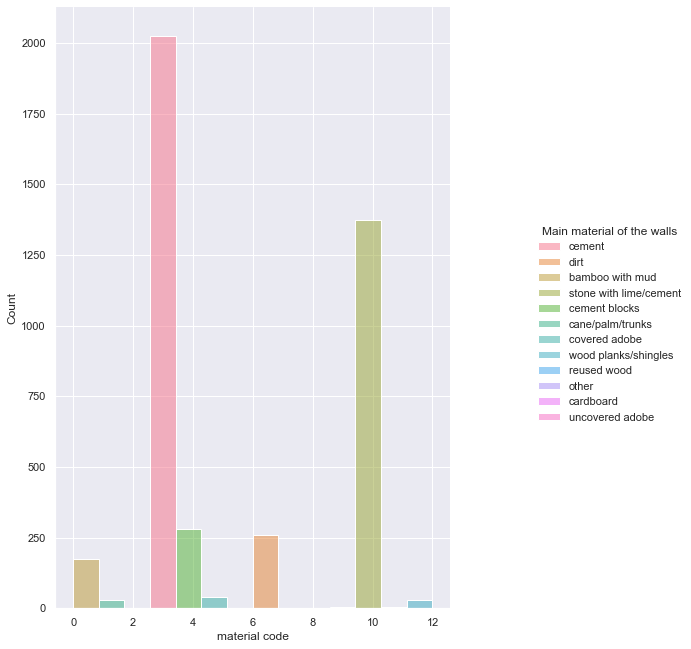

In [88]:
g = sns.displot(data=data[data["Main material of the walls"]!='not a dejure resident'], x="material code",hue="Main material of the walls")
g.fig.set_figwidth(10)
g.fig.set_figheight(10)

In [111]:
df_raw = pd.read_stata('BDBR7RFL.DTA')

In [112]:
df = df_raw.copy()
df.shape

(47828, 1227)

In [138]:
df['v763a']#.value_counts()

KeyError: 'v763a'

In [126]:
a =  pd.crosstab(df.v744d,df.m17)

In [131]:
from scipy import stats
p= stats.chi2_contingency(a)
p

(12.384563615195242,
 0.0020451547753213115,
 2,
 array([[3455.93998868, 1691.06001132],
        [  94.67408945,   46.32591055],
        [   7.38592187,    3.61407813]]))

In [132]:
a

m17,no,yes
v744d,,
no,3437,1710
yes,114,27
don't know,7,4
